In [1]:
%pylab inline
#plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Obstacles
def plot_cir(r):
    ax.add_patch(Circle(
        r[0],
        r[1],
        color=r[2]
    ))
    plot()

def plot_rec(r):
    axis = gca()
    theta = 3.14*r[4]/180
    x = np.cos(theta)*r[0][0] + np.sin(theta)*r[0][1]
    y = np.cos(theta)*r[0][1] - np.sin(theta)*r[0][0]
    x -= r[1]/2
    y -= r[2]/2
    rot = mpl.transforms.Affine2D().rotate_deg(r[4]) + axis.transData
    rec = Rectangle(
        (x,y),
        r[1],
        r[2],
        facecolor=r[3]
    )
    rec.set_transform(rot)
    axis.add_patch(rec)

def plot_cell(r):
    ax.add_patch(Rectangle(
        r,
        1,
        1,
        facecolor='b'
    ))

In [3]:
# Obstacles info

cuboid0 = ((2.725,0),4,1,'k',-45)
cuboid1 = ((7.425,4.725),4,1,'k',0)
cuboid3 = ((-1.025,-1.5),4,1,'k',0)
cuboid4 = ((-6.7,6.4),4,1,'k',0)
cuboid6 = ((-5.15,-6.2),4,1,'k',-30)
cylinder10 = ((-1.775,2.1),1/2,'k')
cylinder11 = ((-5.8,-0.975),1/2,'k')
cylinder12 = ((7.275,-7.75),1/2,'k')
cylinder5 = ((2.425,4.075),1/2,'k')
cylinder6 = ((4.4,0.875),1/2,'k')
cylinder7 = ((2.825,-4.85),1/2,'k')
cylinder8 = ((-0.525,6.3),1/2,'k')
cylinder9 = ((-5.125,3.425),1/2,'k')

sphere9 = ((-7.425,-7.925),1.5/2,'g')
omnirob = ((7.625,8.55),0.1,'b')

rs1 = [cuboid0,cuboid1,cuboid3,cuboid4,cuboid6]
rs2 = [cylinder10,cylinder11,cylinder12,cylinder5,cylinder6,cylinder7,cylinder8,cylinder9]

cs = [(-9,5),(-9,6),(-9,7),
      (-8,-7),(-8,-6),(-8,-5),(-8,5),(-8,6),(-8,7),
      (-7,-7),(-7,-6),(-7,-5),(-7,-2),(-7,-1),(-7,3),(-7,5),(-7,6),(-7,7),
      (-6,-8),(-6,-7),(-6,-6),(-6,-5),(-6,-2),(-6,-1),(-6,2),(-6,3),(-6,4),(-6,5),(-6,6),(-6,7),
      (-5,-8),(-5,-7),(-5,-6),(-5,-2),(-5,-1),(-5,2),(-5,3),(-5,4),(-5,5),(-5,6),(-5,7),
      (-4,-9),(-4,-8),(-4,-7),(-4,-6),(-4,-3),(-4,-2),(-4,-1),
      (-3,-8),(-3,-7),(-3,-3),(-3,-2),(-3,-1),(-3,1),(-3,2),(-3,3),
      (-2,-3),(-2,-2),(-2,-1),(-2,1),(-2,2),(-2,3),(-2,5),(-2,6),(-2,7),
      (-1,-3),(-1,-2),(-1,-1),(-1,1),(-1,2),(-1,5),(-1,6),(-1,7),
      (0,-3),(0,-2),(0,0),(0,1),(0,-1),(0,5),(0,6),(0,7),
      (1,-6),(1,-5),(1,-3),(1,-2),(1,-1),(1,0),(1,1),(1,2),(1,3),(1,4),
      (2,-6),(2,-5),(2,-4),(2,-2),(2,-1),(2,0),(2,1),(2,2),(2,3),(2,4),(2,5),
      (3,-6),(3,-5),(3,-4),(3,-3),(3,-2),(3,-1),(3,0),(3,1),(3,3),(3,4),
      (4,-3),(4,-2),(4,-1),(4,0),(4,1),(4,4),(4,5),
      (5,-1),(5,0),(5,1),(5,3),(5,4),(5,5),
      (6,-9),(6,-8),(6,-7),(6,3),(6,4),(6,5),
      (7,-9),(7,-8),(7,-7),(7,3),(7,4),(7,5),
      (8,-9),(8,-8),(8,3),(8,4),(8,5),
      (9,3),(9,4),(9,5)
      ]


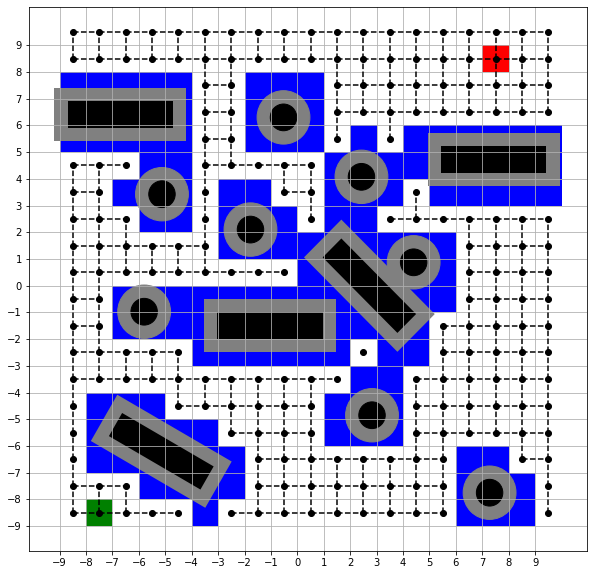

In [4]:
# Initialize the graph
fig = plt.figure()
ax = fig.gca()

# Label cells
for c in cs:
    plot_cell(c)

# Plot obstacles
for r in rs1:
    r_new = (r[0],r[1]+1,r[2]+1,'gray',r[4])
    plot_rec(r_new)
    
for r in rs2:
    r_new = (r[0],r[1]+1/2,'gray')
    plot_cir(r_new)

for r in rs1:
    plot_rec(r)

for r in rs2:
    plot_cir(r)
    
    
ax.add_patch(Rectangle(
        (7,8),
        1,
        1,
        facecolor='r'
    ))

ax.add_patch(Rectangle(
        (-8,-9),
        1,
        1,
        facecolor='g'
    ))
    
# Draw vertices and edges
for i in range(-9,10):
    for j in range(-9,10):
        if (i,j) in cs:
            continue
        plot(i+0.5,j+0.5,'o',color='k')
        if (not (i-1,j) in cs) and i > -9:
            plot([i-0.5,i+0.5],[j+0.5,j+0.5],'--',color='k')
        if (not (i,j-1) in cs) and j > -9:
            plot([i+0.5,i+0.5],[j-0.5,j+0.5],'--',color='k')

# Draw grid
ax.set_xticks(numpy.arange(-9,10,1))
ax.set_yticks(numpy.arange(-9,10,1))
plt.grid()
plt.show()